<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/Simple_ANN_with_MNIST_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

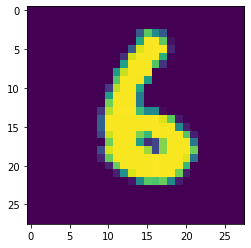

In [ ]:
plt.imshow(np.array(X_train[36]))
plt.show()

In [ ]:
a = []
b = []

In [ ]:
for j in range(len(y_train)):
  a.append(to_categorical(y_train[j],num_classes=10))
y_train = np.array(a)

for i in range(len(y_test)):
  b.append(to_categorical(y_test[i],num_classes=10))
y_test = np.array(b)

In [ ]:
print(y_test.shape)
print(y_train.shape)

(10000, 10)
(60000, 10)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=y_train,batch_size=80,epochs=8,validation_data=(X_test,y_test))

Epoch 1/8
750/750 [==============================] - 3s 3ms/step - loss: 1.8516 - accuracy: 0.4348 - val_loss: 0.8444 - val_accuracy: 0.8067
Epoch 2/8
750/750 [==============================] - 2s 3ms/step - loss: 0.7452 - accuracy: 0.8251 - val_loss: 0.5141 - val_accuracy: 0.8706
Epoch 3/8
750/750 [==============================] - 2s 3ms/step - loss: 0.5066 - accuracy: 0.8635 - val_loss: 0.4169 - val_accuracy: 0.8824
Epoch 4/8
750/750 [==============================] - 2s 3ms/step - loss: 0.4232 - accuracy: 0.8823 - val_loss: 0.3978 - val_accuracy: 0.8860
Epoch 5/8
750/750 [==============================] - 2s 3ms/step - loss: 0.3873 - accuracy: 0.8867 - val_loss: 0.3843 - val_accuracy: 0.8859
Epoch 6/8
750/750 [==============================] - 2s 3ms/step - loss: 0.3599 - accuracy: 0.8946 - val_loss: 0.3298 - val_accuracy: 0.9058
Epoch 7/8
750/750 [==============================] - 2s 3ms/step - loss: 0.3275 - accuracy: 0.9034 - val_loss: 0.3352 - val_accuracy: 0.9007
Epoch 8/8
750

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[[0.22187066 0.07244921 0.32572895 ... 0.99784684 0.01415956 0.72390956]
 [0.24789128 0.06095707 0.93052346 ... 0.04525995 0.62968695 0.00609398]
 [0.10595876 0.9986354  0.00566867 ... 0.03774327 0.41403955 0.34753296]
 ...
 [0.12098241 0.00363362 0.2564447  ... 0.2351686  0.18396512 0.8218638 ]
 [0.16848436 0.44935873 0.00589234 ... 0.07299367 0.44548613 0.1501559 ]
 [0.36680743 0.2567235  0.19223222 ... 0.00823542 0.08118591 0.03056785]]


In [ ]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


In [ ]:
predictions[52]

5

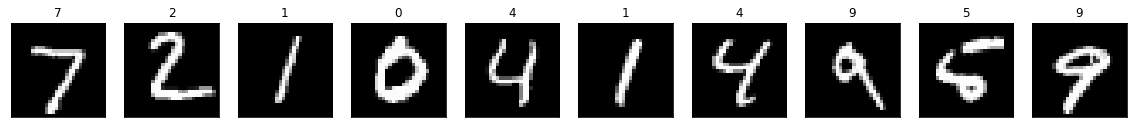

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()